# **K-Means Clustering from Scratch**

In [ ]:
# Import important libraries
import numpy as np 
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
# Load and read data
data = pd.read_csv("clustering.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


**We will take two variables from data "ApplicantIncome" and "LoanAmount"**.

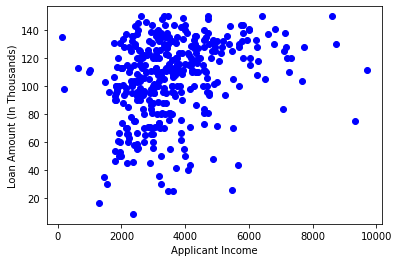

In [ ]:
X = data[["ApplicantIncome", "LoanAmount"]]
# Visualize data point
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount (In Thousands)")
plt.show()

### **Steps of K-Means clustering**

1. Choose the number of clusters K
2. Select K random points from the data as centroid
3. Assign each data point to the closet cluster centriod
4. Recompute the centriod of newly formed cluster, next step is to compute the centriod of newly formed clusters
5. Repeat steps 3 and 4

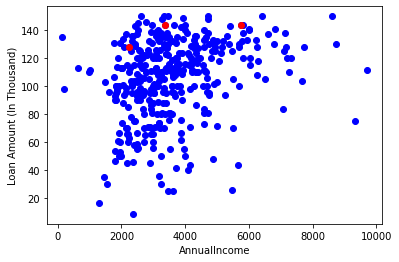

In [ ]:
# step 1 and 2

# number of centriod
K=3

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c="red")
plt.xlabel("AnnualIncome")
plt.ylabel("Loan Amount (In Thousand)")
plt.show()

In [ ]:
Centroids

,ApplicantIncome,LoanAmount
343,2239,128.0
44,3357,144.0
199,5746,144.0


In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
          if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


218.5582302154238
255.37125148586168
244.66095351174067
229.06905235705375
218.24897861156342
107.07928213052429
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


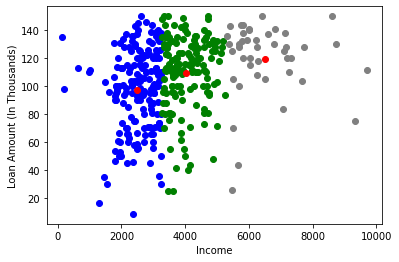

In [ ]:
color=['blue','green','grey']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

# **K-Means Custering from Scratch Part-2**

`On dataset crimes.csv`



In [1]:
# Import important libraries
import numpy as np 
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# Load and read data
data = pd.read_csv("crime.csv")
data.head()

,Date,Latitude,Longitude,Magnitude
0,2017-02-06T20:11:14.000Z,38.894376,-76.997556,4
1,2017-06-03T12:54:27.000Z,38.906838,-77.058661,6
2,2017-04-07T00:00:00.000Z,38.960739,-77.018034,16
3,2017-05-31T11:39:56.000Z,38.905151,-77.063998,4
4,2017-07-30T00:00:00.000Z,38.949532,-77.020246,16


Text(0, 0.5, 'Longitude')

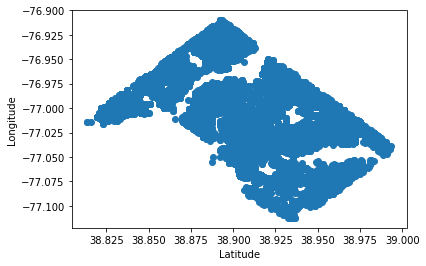

In [3]:
# Visiualize data
plt.scatter(data.Latitude,data.Longitude)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

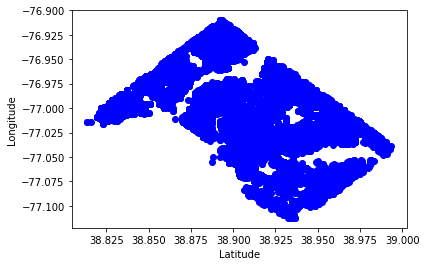

In [4]:
X = data[["Latitude", "Longitude"]]
plt.scatter(X["Latitude"], X["Longitude"], c="blue")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

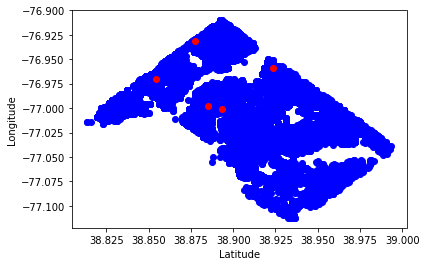

In [5]:
# step 1 and 2

# number of centriod
K=5

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["Latitude"], X["Longitude"], c="blue")
plt.scatter(Centroids["Latitude"], Centroids["Longitude"], c="red")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [6]:
Centroids

,Latitude,Longitude
22740,38.923394,-76.958404
18765,38.885133,-76.997326
8339,38.893331,-77.000576
5539,38.854564,-76.970576
5454,38.877582,-76.931267


In [7]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Latitude"]-row_d["Latitude"])**2
            d2 = (row_c["Longitude"]-row_d["Longitude"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
          if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Longitude", "Latitude"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Longitude'] - Centroids['Longitude']).sum() + (Centroids_new['Latitude'] - Centroids['Latitude']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Longitude","Latitude"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.006347994129512813
-0.0024259330898175335
-0.0015897858237536866
-0.001352515722189196
-0.0013882614073992272
-0.0027607838548320274
-0.001730249925870453
-0.0003497007593509238
-0.00037004455606393094
-0.00046140296431929073
-0.00028185988095685843
-0.00049928938149435
-0.0001259899917371854
-0.0002424002842928985
6.397682647474312e-05
-0.00010540264985081649
0.00035294956045106574
-0.0013206404221932644
-0.0010204874127097696
-0.002126141156423955
-0.0016804633398095348
-0.00019387782029411937
0.0006006578616535307
0.0005288961362310829
0.0007667831151536575
0.0006346817568712027
0.0011518983895442148
0.0006555836705288698
0.00041781074354929615
0.000204537904828328
0.0004924201907812176
9.77826650725433e-05
5.5542308082578984e-05
1.3693700751105098e-05
0.0


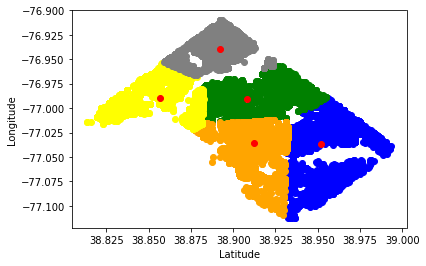

In [8]:
color=['blue','green','orange', 'yellow', 'grey']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Latitude"],data["Longitude"],c=color[k])
plt.scatter(Centroids["Latitude"],Centroids["Longitude"],c='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()